### 29-04-2020

### Objectives
* Understanding Linear Models
* Understanding Non-Linear Models
* Linear Rigression using Scikit_learn 
* The Loss Function
* Gradient Descent Algorithm for weight optimization 
* Implement Linear Regression using numpy

<img src = "https://camo.githubusercontent.com/e527deb0f550b62d37ed23604f3e67504fa57021/68747470733a2f2f646576656c6f706572732e676f6f676c652e636f6d2f6d616368696e652d6c6561726e696e672f63726173682d636f757273652f696d616765732f437269636b6574506f696e74732e737667">

In [45]:
# <img src = 'image address'> in mark down

### What can we say from the data ?
* Cricket Chrips per min increases with temperature 
* this is what is called as linear relationship
* Target is continious thus the rigression problem 
* can we predict line such that target can temp can be predicted using chrips per min ?

<img src="https://camo.githubusercontent.com/f6aba8afdc92edef2a7a82a9fe16185c5de0b20b/68747470733a2f2f646576656c6f706572732e676f6f676c652e636f6d2f6d616368696e652d6c6561726e696e672f63726173682d636f757273652f696d616765732f437269636b65744c696e652e737667">

* posibibilities of lines are infinite.
* which of the possibilities of lines is the best?
- ans 2nd


<img src = "https://camo.githubusercontent.com/73ba12bba861240edfbf91d7ac8a5ccc17054cea/68747470733a2f2f646576656c6f706572732e676f6f676c652e636f6d2f6d616368696e652d6c6561726e696e672f63726173682d636f757273652f696d616765732f4c6f7373536964654279536964652e706e67">

* we need a way to measure & quantify a line if its better than others 
* $Loss = 1/N(predicted-actual)^2$
* N is the number of data points 
* Thus we have to find a line whose Loss is least 
<hr>

### How is a line represented ?
* y = w1*x1+w0
* w is slope and w0 is intersept
* Thus our problem statement becomes finding the(w0,w1),for which loss is least
* The OPtimizatoin function : Mathematically,We have to minimize loss by changing w0&w1 or weights
<hr>

### Understanding non_linear models

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
from sklearn.datasets import make_blobs

In [48]:
X,_ = make_blobs(n_features = 2,cluster_std=10)

Text(0, 0.5, 'Y')

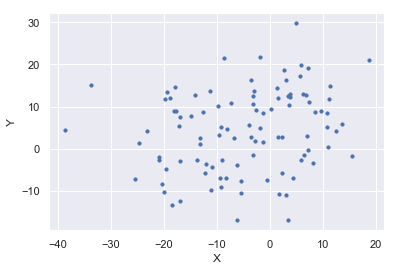

In [49]:
plt.scatter(X[:,0],X[:,1],s=10)
plt.xlabel('X')
plt.ylabel('Y')

### IMPORTENT:
* LINEAR MODELS won't work for such data,there is no linear relationship between X & Y
* Use non_linear models hear

In [50]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


In [51]:
X,y = make_regression(n_features = 1,n_samples=100,noise=15)

Text(0, 0.5, 'y')

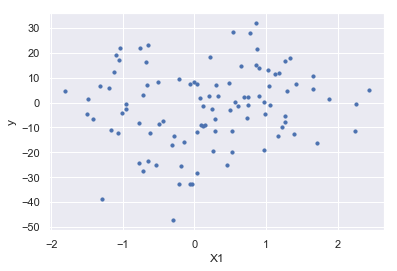

In [52]:
plt.scatter(X,y,s=10)
plt.xlabel('X1')
plt.ylabel('y')

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
out = lr.predict(X)

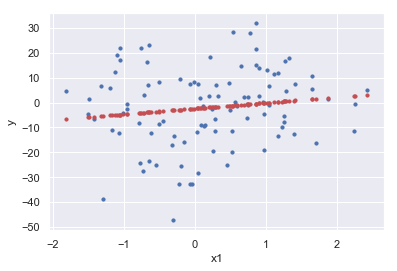

In [56]:
plt.scatter(X,y,s=10)
plt.xlabel("x1")
plt.ylabel("y")
plt.scatter(X,out,s=10,c='r')

In [57]:
lr.coef_

array([2.30184635])

In [58]:
lr.intercept_

-2.42595877981345

In [59]:
lr.predict(X[:1])

array([-1.21969717])

In [60]:
X[:1]

array([[0.52404089]])

In [61]:
29.72*1.818+1.08966

55.12062

In [62]:
lr.coef_*X[:1]+lr.intercept_

array([[-1.21969717]])

In [63]:
X,y = make_regression(n_features=3,n_samples=100,noise = 15)

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
lr.coef_

array([76.3327489 , 52.73811037, 61.67404725])

In [67]:
lr.intercept_

0.3573571060946553

In [68]:
np.sum(lr.coef_*X[:2],axis=1)+lr.intercept_

array([-235.08417178,   36.31133855])

In [69]:
lr.predict(X[:2])

array([-235.08417178,   36.31133855])

 * for 10 features and 1 target number of weights will be 10 

### new_dataset

In [74]:
from sklearn.datasets import california_housing

In [75]:
data = california_housing.fetch_california_housing()

In [76]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [77]:
data.data.shape

(20640, 8)

In [82]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [83]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

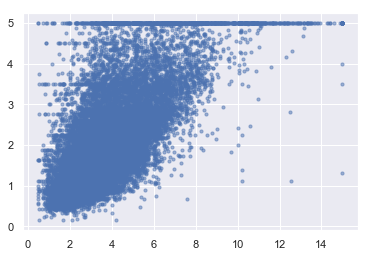

In [84]:
plt.scatter(data.data[:,0],data.target,s=10,alpha=0.5)

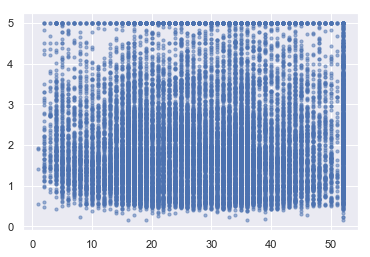

In [85]:
plt.scatter(data.data[:,1],data.target,s=10,alpha=0.5)

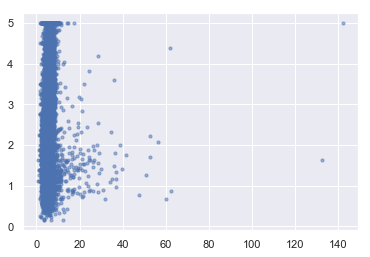

In [86]:
plt.scatter(data.data[:,2],data.target,s=10,alpha=0.5)

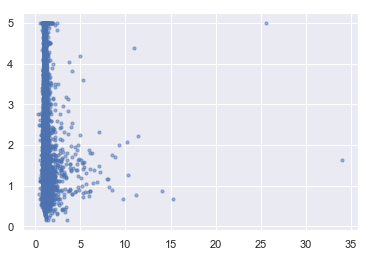

In [89]:
plt.scatter(data.data[:,3],data.target,s=10,alpha=0.5)


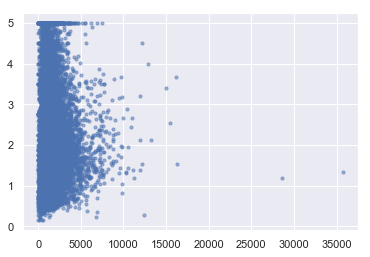

In [90]:
plt.scatter(data.data[:,4],data.target,s=10,alpha=0.5)

In [91]:
house_data = pd.DataFrame(data.data,columns=data.feature_names)

In [93]:
house_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [94]:
house_data[house_data.AveBedrms>10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49


In [95]:
house_data['price']=data.target

In [96]:
house_data = house_data[house_data.AveBedrms<20]

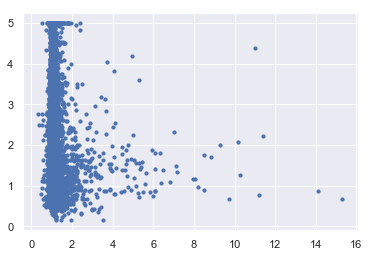

In [97]:
plt.scatter(house_data.AveBedrms,house_data.price,s=10)

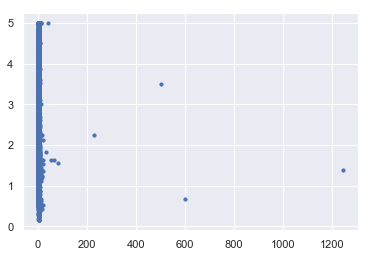

In [98]:
plt.scatter(house_data.AveOccup,house_data.price,s=10)

In [99]:
lr = LinearRegression()

In [101]:
lr.fit(house_data.drop(columns=['price']),house_data.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
lr.coef_

array([ 4.46747780e-01,  9.52807138e-03, -1.25019476e-01,  7.77453808e-01,
       -2.97216866e-06, -3.81744254e-03, -4.19046986e-01, -4.33186953e-01])

In [103]:
from sklearn.metrics import mean_squared_error,r2_score

In [104]:
pred = lr.predict(house_data.drop(columns=['price']))

In [105]:
mean_squared_error(y_pred=pred,y_true=house_data.price)

0.5204759442597212

In [106]:
r2_score(y_pred=pred,y_true=house_data.price)

0.6090331540811058

### Common Questions for Interviews
* does linear regressoin need scaling?
 - a:NO
* why?
 - A: A model coef_ takes care of the scale of the data
* Does Linear Rigression do scalling internally?
 - A: Yes
* why?
 - A:so that corf tell comparable importence of features

In [107]:
lr.coef_

array([ 4.46747780e-01,  9.52807138e-03, -1.25019476e-01,  7.77453808e-01,
       -2.97216866e-06, -3.81744254e-03, -4.19046986e-01, -4.33186953e-01])

In [108]:
house_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119029,0.386155,-0.076197,0.004796,0.018766,-0.079771,-0.015185,0.688343
HouseAge,-0.119029,1.000000,-0.182391,-0.100416,-0.296222,0.013193,0.011118,-0.108188,0.105606
AveRooms,0.386155,-0.182391,1.000000,0.789850,-0.077378,-0.005407,0.115832,-0.030776,0.171670
AveBedrms,-0.076197,-0.100416,0.789850,1.000000,-0.073975,-0.007376,0.076362,0.018649,-0.064961
Population,0.004796,-0.296222,-0.077378,-0.073975,1.000000,0.069862,-0.108625,0.099750,-0.024527
AveOccup,0.018766,0.013193,-0.005407,-0.007376,0.069862,1.000000,0.002374,0.002475,-0.023738
Latitude,-0.079771,0.011118,0.115832,0.076362,-0.108625,0.002374,1.000000,-0.924732,-0.144361
Longitude,-0.015185,-0.108188,-0.030776,0.018649,0.099750,0.002475,-0.924732,1.000000,-0.045946
price,0.688343,0.105606,0.171670,-0.064961,-0.024527,-0.023738,-0.144361,-0.045946,1.000000
